In [51]:
import pandas as pd
data = pd.read_csv(r"data-ori.csv")


In [52]:
from sklearn.model_selection import train_test_split

features = [feat for feat in data.columns if feat !='Result']

X = data[features]
y = data['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

X_train.shape, X_test.shape

((3529, 10), (883, 10))

In [53]:
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns")

num_features = [feat for feat in features if data[feat].dtype != object]
cat_features = [feat for feat in features if data[feat].dtype == object]

print(f"Total number of features : {len(features)}")
print(f"Number of numerical features : {len(num_features)}")
print(f"Number of categorical features : {len(cat_features)}\n")

The dataset contains 4412 rows and 11 columns
Total number of features : 10
Number of numerical features : 9
Number of categorical features : 1



In [54]:
X_train=X_train.drop(["SEX"],axis=1)

In [55]:
X_test=X_test.drop(["SEX"],axis=1)


In [56]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

Model: Random Forest
Confusion Matrix:
[[440  86]
 [135 222]]
Accuracy: 0.7497168742921857


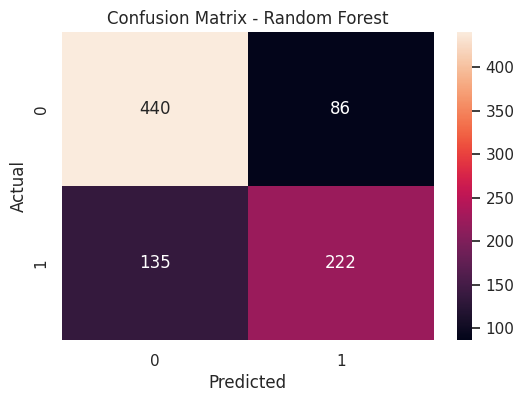

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       526
           1       0.72      0.62      0.67       357

    accuracy                           0.75       883
   macro avg       0.74      0.73      0.73       883
weighted avg       0.75      0.75      0.75       883

Model: DecisionTree
Confusion Matrix:
[[366 160]
 [136 221]]
Accuracy: 0.6647791619479049


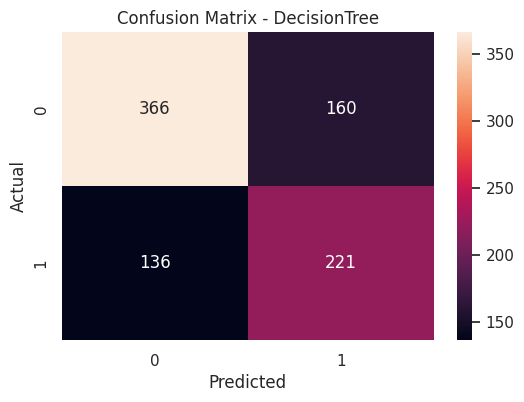

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       526
           1       0.58      0.62      0.60       357

    accuracy                           0.66       883
   macro avg       0.65      0.66      0.66       883
weighted avg       0.67      0.66      0.67       883

Model: KNN
Confusion Matrix:
[[407 119]
 [163 194]]
Accuracy: 0.6806342015855039


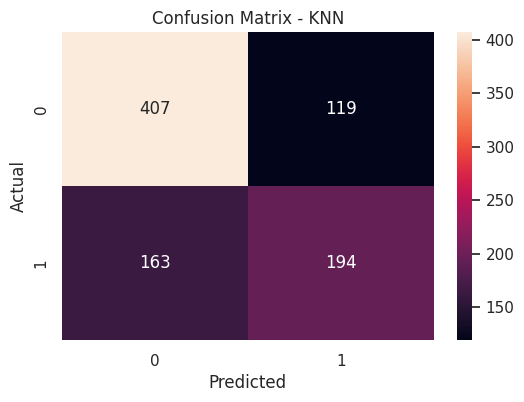

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       526
           1       0.62      0.54      0.58       357

    accuracy                           0.68       883
   macro avg       0.67      0.66      0.66       883
weighted avg       0.68      0.68      0.68       883

Model: MLPClassifier
Confusion Matrix:
[[445  81]
 [176 181]]
Accuracy: 0.7089467723669309


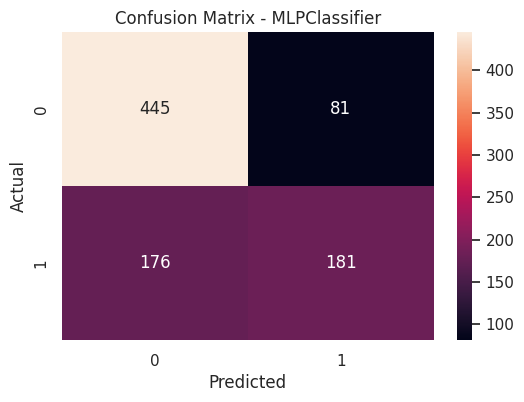

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       526
           1       0.69      0.51      0.58       357

    accuracy                           0.71       883
   macro avg       0.70      0.68      0.68       883
weighted avg       0.71      0.71      0.70       883

Model: AdaBoost
Confusion Matrix:
[[429  97]
 [157 200]]
Accuracy: 0.7123442808607021


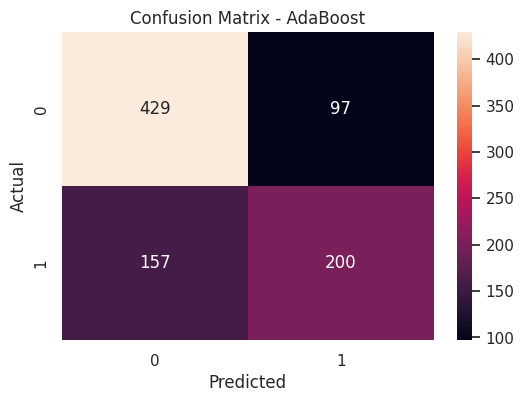

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       526
           1       0.67      0.56      0.61       357

    accuracy                           0.71       883
   macro avg       0.70      0.69      0.69       883
weighted avg       0.71      0.71      0.71       883

Model: XGBoost
Confusion Matrix:
[[422 104]
 [125 232]]
Accuracy: 0.7406568516421291


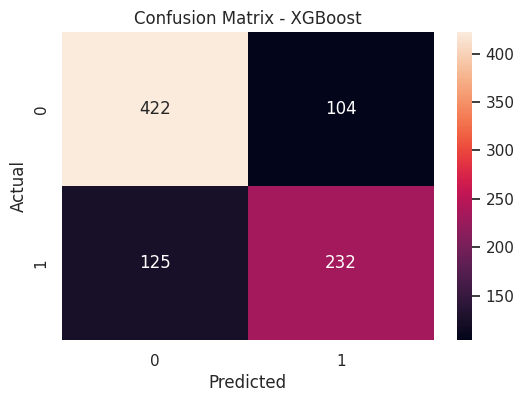

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       526
           1       0.69      0.65      0.67       357

    accuracy                           0.74       883
   macro avg       0.73      0.73      0.73       883
weighted avg       0.74      0.74      0.74       883

The best performing classifier is: Random Forest with an accuracy of 0.75


<ipython-input-57-2693aaea94d8>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(models.keys()), y=accuracies, palette="muted")


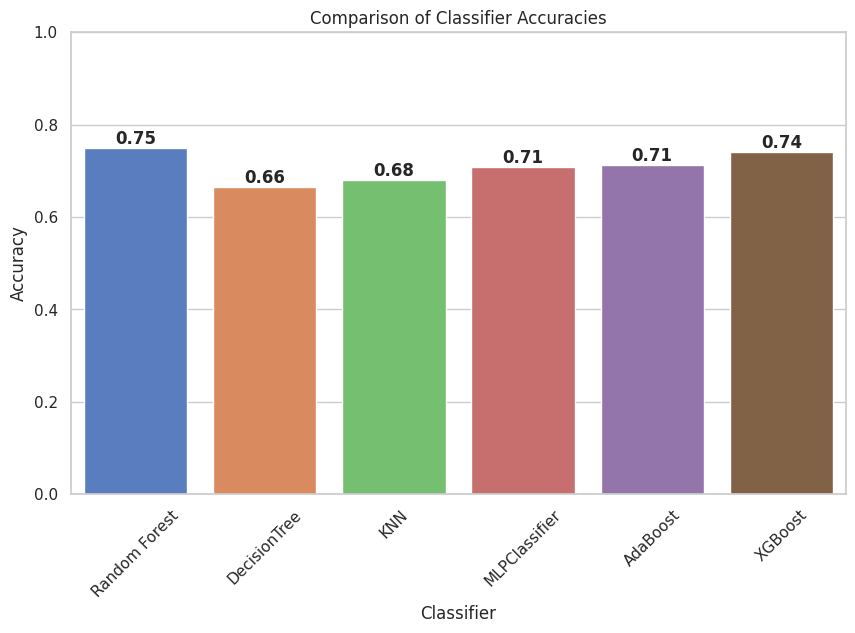

In [57]:
#Creating a dictionary to store model name as key and model function as value.

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=3000),
    "DecisionTree" : DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "MLPClassifier": MLPClassifier(hidden_layer_sizes=(64,),activation = "relu"),
    #"SVM": SVC(kernel="linear"),
    "AdaBoost" : AdaBoostClassifier(n_estimators=100, random_state=40),
    "XGBoost": XGBClassifier()
}

accuracies = []  # Store the accuracies of all models
best_model = None #Stores Best model name
best_accuracy = 0 #Stores best model Accuracy.

for model_name, model in models.items():
    print(f"Model: {model_name}")
    print("=" * 30)

    # Fit the model
    model.fit(X_train, y_train)
    X_test_processed = X_test

    # Predict on the test set
    y_pred = model.predict(X_test_processed)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Calculate accuracy
    accuracy = np.mean(y_pred == y_test)
    accuracies.append(accuracy)  # Store the accuracy for later plotting
    print("Accuracy:", accuracy)

    # Plotting the heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d",)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    cr = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(cr)
    print("=" * 30)

    # Check if the current model has better accuracy
    if accuracy > best_accuracy:
        best_model = model_name
        best_accuracy = accuracy

print(f"The best performing classifier is: {best_model} with an accuracy of {best_accuracy:.2f}")

# Set Seaborn style
sns.set(style="whitegrid")

# Plotting the histogram of accuracies with beautiful aesthetics
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(models.keys()), y=accuracies, palette="muted")
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Comparison of Classifier Accuracies")
plt.ylim(0, 1.0)  # Set the y-axis limit to ensure the scale is from 0 to 1
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility

# Add accuracy labels on top of each bar
for i, acc in enumerate(accuracies):
    ax.text(i, acc, f"{acc:.2f}", ha='center', va='bottom', fontweight='bold')

plt.show()


### Since We observe that Random foreest and XGBoost gives the best accuracy , We create a custom XGBoost ensemblemer that uses RandomForest Ensembler as the  Base Learrner ###

Accuracy: 73.95%
Confusion Matrix: [[445  81]
 [149 208]]


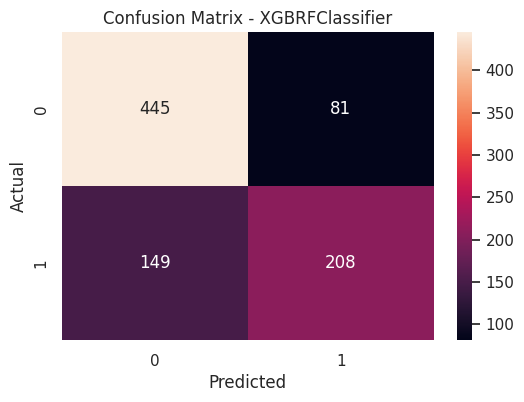

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.79       526
           1       0.72      0.58      0.64       357

    accuracy                           0.74       883
   macro avg       0.73      0.71      0.72       883
weighted avg       0.74      0.74      0.73       883



In [58]:
class RandomForestBaseLearner:
    def __init__(self, num_estimators=100, max_depth=None):
        self.num_estimators = num_estimators
        self.max_depth = max_depth
        self.model = None

    def fit(self, X, y):
        self.model = RandomForestClassifier(n_estimators=self.num_estimators, max_depth=self.max_depth)
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)
#from xgboost import XGBClassifier as xgb
import xgboost as xgb

from sklearn.metrics import accuracy_score
# Create an XGBoost classifier with the custom base learner
xgb_custom_base = xgb.XGBClassifier(
    base_score=0.5,
    booster="gbtree",
    n_estimators=100,  # Number of boosting rounds
    max_depth=3,  # Maximum depth of the trees
    learning_rate=0.1
)

# Fit the XGBoost model with the custom base learner
xgb_custom_base.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_custom_base.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:",cm)
accuracy = np.mean(y_pred == y_test)

    # Plotting the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d",)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - XGBRFClassifier")
plt.show()

cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)
print("=" * 30)

### Now after finding the classification accurraccy ,we conclude that the maximum accurracies of the classification model is arround 75%. ###

### Now we devise a Differentially Private Arificial Neural Network , that adds gaussian noise to the EHR training data to ensure privacy of the client (pateint) is secured.Now we perform the same binary classification task and check the accuracy with the added gaussian noise ###

In [59]:
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()

import numpy as np

tf.get_logger().setLevel('ERROR')

In [60]:
import tensorflow_privacy

from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy

In [61]:
#pip install tensorflow-privacy

In [62]:
epochs = 3
batch_size = 250
l2_norm_clip = 1.5
noise_multiplier = 1.3
num_microbatches = 250
learning_rate = 0.25

if batch_size % num_microbatches != 0:
  raise ValueError('Batch size should be an integer multiple of the number of microbatches')

In [63]:
import tensorflow as tf
import keras
from keras import layers

In [64]:
import tensorflow as tf

model =  keras.Sequential([
    layers.Dense(64, activation='relu', ),  # Input layer with 9 features
    layers.Dense(32, activation='relu'),                   # Hidden layer with 32 neurons
    layers.Dense(2, activation='softmax')                  # Output layer with 1 neuron for binary classification
])



In [65]:
optimizer = tensorflow_privacy.DPKerasSGDOptimizer(
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
    num_microbatches=num_microbatches,
    learning_rate=learning_rate)

loss = tf.keras.losses.BinaryCrossentropy(
    from_logits=False, reduction=tf.losses.Reduction.NONE)

In [46]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3529, 9)
y_train shape: (3529,)
X_test shape: (883, 9)
y_test shape: (883,)


In [47]:
model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             multiple                  640       
                                                                 
 dense_10 (Dense)            multiple                  2080      
                                                                 
 dense_11 (Dense)            multiple                  33        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming your data is stored in a DataFrame named 'data'
# Remove the "SEX" column as you did before
#data = data.drop(columns=["SEX"])

# Split data into features (X) and target (y)
X = data.drop(columns=['Result']).values
y = data['Result'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),  # Input layer
    Dense(32, activation='relu'),                             # Hidden layer
    Dense(1, activation='sigmoid')                            # Output layer
])

# Compile the model
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                640       
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Train on 3529 samples, validate on 883 samples
Epoch 1/500
3529/3529 [==============================] - 1s 162us/sample - loss: 1.1527 - acc: 0.6013 - val_loss: 0.6481 - val_acc: 0.6036


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Epoch 2/500
3529/3529 [==============================] - 0s 81us/sample - loss: 0.6334 - acc: 0.6679 - val_loss: 0.6500 - val_acc: 0.6478
Epoch 3/500
3529/3529 [==============================] - 0s 76us/sample - loss: 0.6248 - acc: 0.6823 - val_loss: 0.6426 - val_acc: 0.6410
Epoch 4/500
3529/3529 [==============================] - 0s 75us/sample - loss: 0.6139 - acc: 0.6821 - val_loss: 0.6559 - val_acc: 0.6523
Epoch 5/500
3529/3529 [==============================] - 0s 67us/sample - loss: 0.6105 - acc: 0.6835 - val_loss: 0.6503 - val_acc: 0.6591
Epoch 6/500
3529/3529 [==============================] - 0s 78us/sample - loss: 0.6068 - acc: 0.6843 - val_loss: 0.6253 - val_acc: 0.6682
Epoch 7/500
3529/3529 [==============================] - 1s 198us/sample - loss: 0.6075 - acc: 0.6812 - val_loss: 0.6120 - val_acc: 0.6580
Epoch 8/500
3529/3529 [==============================] - 1s 285us/sample - loss: 0.6007 - acc: 0.6838 - val_loss: 0.6569 - val_acc: 0.6602
Epoch 9/500
3529/3529 [=========

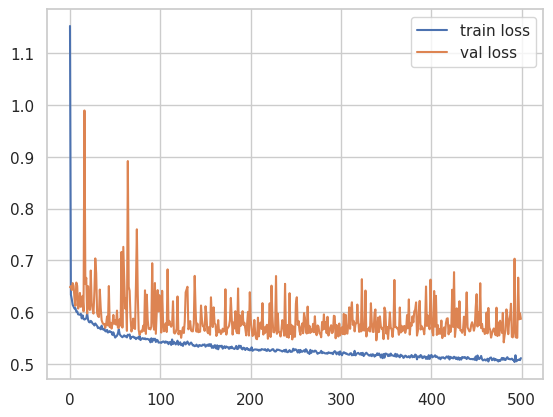

In [72]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()

#plt.savefig('/content/drive/MyDrive/loss-rps-1.svg')
plt.show()

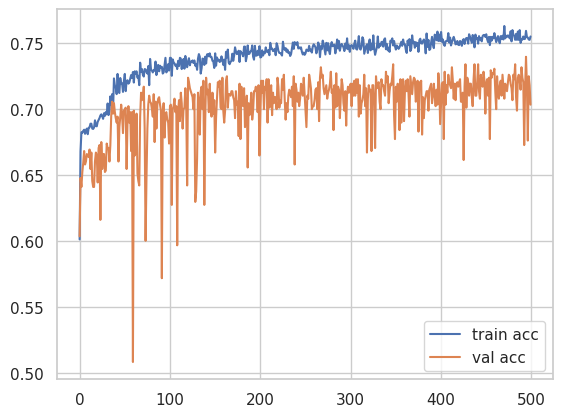

In [80]:
# accuracies
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend()

#plt.savefig('/content/drive/MyDrive/acc-rps-1.svg')
plt.show()

In [76]:
print(history)

### After adding gaussian noise to our DP_NN model we obtain an accuracy of arround 75%  and Validation of 71% which is significant for tthe problem statement ###